In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)

In [3]:
#load the dataset
leads = pd.read_csv("leads.csv")
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# finding null values

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# Replacing the "select" category as null values in the given dataset
# and knowing the percentage of null values

leads = leads.replace("Select",np.NaN)
round(leads.isna().mean(),3)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   36.6
How did you hear about X Education               78.5
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

# Missing Value Treatment

In [14]:
#1 dropping "lead profile" and "How did you hear about X Education" columns for its high percentage of null values

leads.drop(["Lead Profile","How did you hear about X Education"],axis=1,inplace=True)

In [15]:
round(leads.isna().mean(),3)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   36.6
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

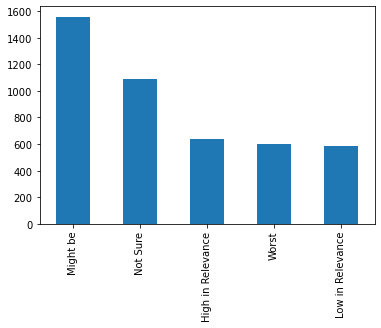

In [16]:
#2 analysing lead quality

leads["Lead Quality"].value_counts().plot(kind="bar")

In [17]:
# replacing all the null values of "Lead Quality" column with its "Not sure" category

leads["Lead Quality"] = leads["Lead Quality"].replace(np.NaN,"Not Sure")

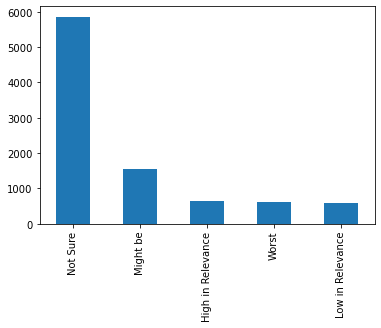

In [18]:
leads["Lead Quality"].value_counts().plot(kind="bar")

In [21]:
round(leads.isna().mean(),3)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   36.6
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [23]:
#3 dropping 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 
# 'Asymmetrique Profile Score' columns as they are updated columns by sales team with high percentage of null values

leads.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],axis = 1, inplace =True)
round(leads.isna().mean(),3)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   36.6
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [24]:
#4 analysing "city" column
leads["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

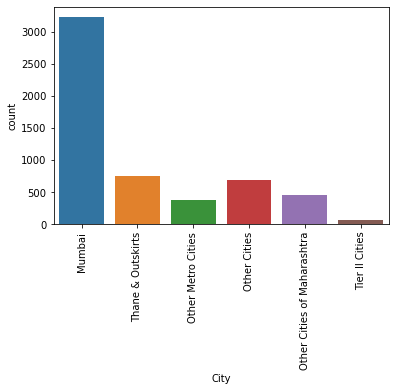

In [25]:
sns.countplot(x="City",data=leads)
plt.xticks(rotation=90)

In [26]:
# since 60% of people come from Mumbai we can replace null values of City column with "Mumbai"  

leads["City"] = leads["City"].replace(np.NaN,"Mumbai")

In [28]:
#5 Analysing "tags Column"

leads["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [29]:
leads["Tags"].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

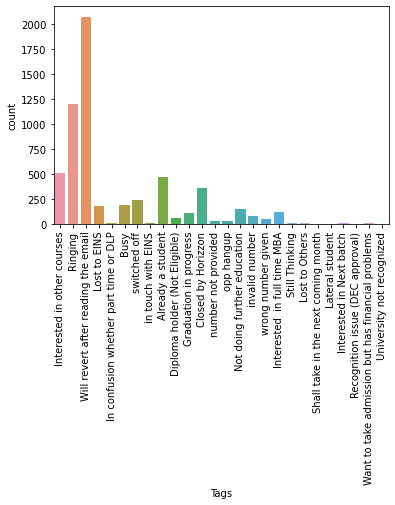

In [30]:
sns.countplot(x="Tags",data=leads)
plt.xticks(rotation=90)

In [31]:
# replace null values with high percentage category from the tags column

leads["Tags"] = leads["Tags"].replace(np.NaN,"Will revert after reading the email")

In [32]:
# combine all the data points with small percentage values from "Tags"column into "others" category

leads["Tags"] = leads["Tags"].replace(['In confusion whether part time or DLP', 
       'in touch with EINS', 'Diploma holder (Not Eligible)', 
        'number not provided', 'opp hangup','invalid number',
       'wrong number given','Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'],"others")

In [33]:
leads["Tags"].value_counts()

Will revert after reading the email    5425
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
others                                  302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

In [34]:
round(leads.isna().mean(),3)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   36.6
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [35]:
#6 Analysing Specialization column
leads["Specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [36]:
# here for this we can create new category called "others" and replace all the null values
leads["Specialization"] = leads["Specialization"].replace(np.NaN,"others")
round(leads.isna().mean(),3)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                    0.0
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [37]:
#7 analysing "country" and "What matters most to you in choosing a course" columns

leads["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [38]:
leads["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Germany                    4
Nigeria                    4
Kuwait                     4
South Africa               4
Canada                     4
Sweden                     3
Asia/Pacific Region        2
Italy                      2
Philippines                2
Bangladesh                 2
Ghana                      2
Uganda                     2
Netherlands                2
Belgium                    2
China                      2
Sri Lanka                  1
Malaysia                   1
Vietnam                    1
Denmark                    1
Tanzania                   1
Indonesia                  1
Switzerland   

In [40]:
# Replacing null values of each with there most frequently occuring category (Mode) of their respective columns

leads["What matters most to you in choosing a course"] = leads["What matters most to you in choosing a course"].replace(np.NaN,"Better Career Prospects")
leads["Country"] = leads["Country"].replace(np.NaN,"India")

In [41]:
#8 occupation column
leads["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [42]:
# Replacing null values of occupation column with its mode

leads["What is your current occupation"]=leads["What is your current occupation"].replace(np.NaN,"Unemployed")

In [43]:
round(leads.isna().mean(),3)*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.4
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      1.5
Total Time Spent on Website                      0.0
Page Views Per Visit                             1.5
Last Activity                                    1.1
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [44]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization What is your current occupation  \
0   India                   others                      Unemployed   
1   India                   others                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India                   others                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing          Not Sure   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    City  \
0                                No                        No  Mumbai   
1                                No                        No  Mumbai   
2                                No                        No  Mumbai   
3                                No                        No  Mumbai   
4                                No                        No  Mumbai   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                

In [45]:
# dropping all the remaining null value rows 
leads.dropna(axis=0,inplace=True)
leads.isna().mean()

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [46]:
leads.shape

(9074, 31)

In [47]:
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9074.000000  9074.000000  9074.000000                  9074.000000   
mean   617032.619352     0.378554     3.456028                   482.887481   
std     23348.029512     0.485053     4.858802                   545.256560   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596406.000000     0.000000     1.000000                    11.000000   
50%    615278.500000     0.000000     3.000000                   246.000000   
75%    637176.500000     1.000000     5.000000                   922.750000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9074.000000  
mean               2.370151  
std                2.160871  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.200000  
max               55.000000

In [48]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [49]:
# Converting the "Lead Number" column datatype from "int" to "object"
leads["Lead Number"] = leads["Lead Number"].astype("object")

In [51]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# Univariate Analysis

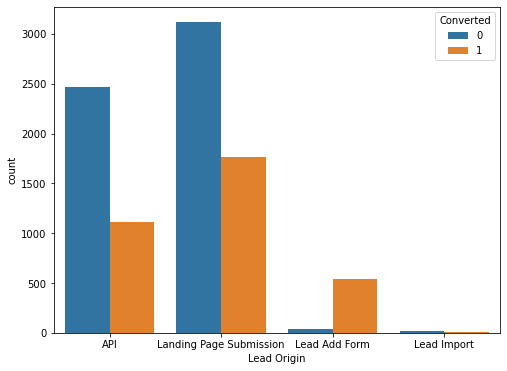

In [52]:
#1 "lead origin" column

plt.figure(figsize=[8,6])
sns.countplot(x="Lead Origin",data=leads,hue="Converted")
plt.show()

### Inferences:
- Lead Add form category from "Lead Origin column have high conversion rate.
- API and landing page submission categories have low conversion rates.

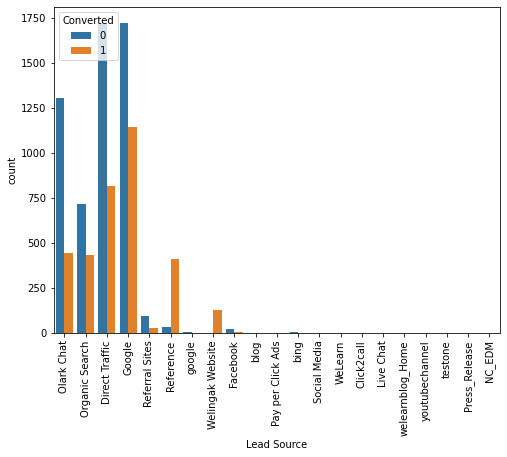

In [53]:
#2 For "Lead Source" column
plt.figure(figsize=[8,6])
sns.countplot(x="Lead Source",data=leads,hue="Converted")
plt.xticks(rotation=90)
plt.show()

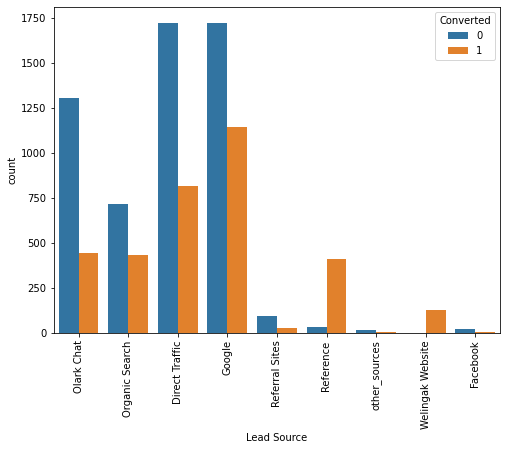

In [54]:
# combining all the unecessary categories in the "Lead Source" column
leads["Lead Source"] = leads["Lead Source"].replace(['google', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM',],"other_sources")
plt.figure(figsize=[8,6])
sns.countplot(x="Lead Source",data=leads,hue="Converted")
plt.xticks(rotation=90)
plt.show()

### Inferences:
- Customers from Reference and welingak webiste under "Lead Source" column have high chances of getting converted.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

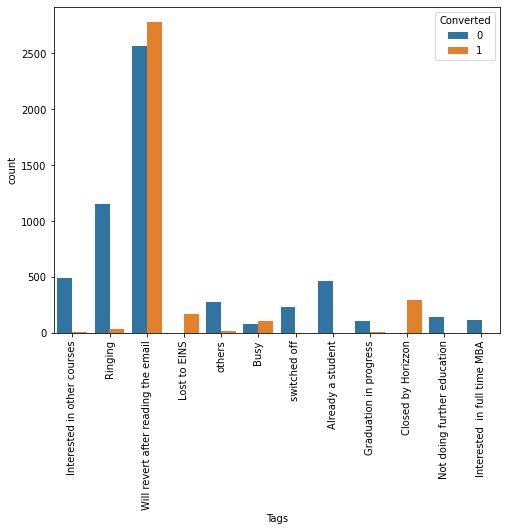

In [55]:
#3 for "Tags" column
plt.figure(figsize=[8,6])
sns.countplot(x="Tags",data=leads,hue="Converted")
plt.xticks(rotation=90)

### Inferences:
- Customers with Tags like "Lost to EINS" and "Closed by Horizzon" have high conversion rates
- Whereas customers with Tags like "will respond after reading the Email" and "Busy" have nearly 50% conversion rate.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

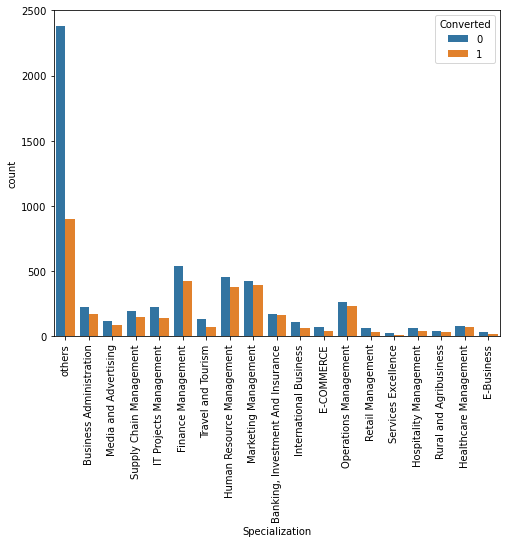

In [56]:
#4 for "Specialization" column
plt.figure(figsize=[8,6])
sns.countplot(x="Specialization",data=leads,hue="Converted")
plt.xticks(rotation=90)

No particular inference can be drawn drom specialization column

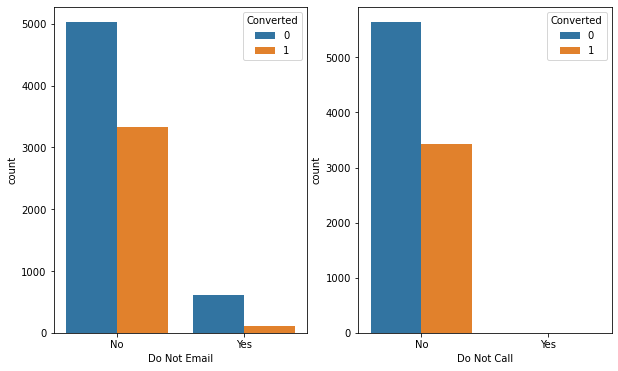

In [57]:
#5 for both "Do Not Email" and "Do Not Call" columns
plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
sns.countplot(x="Do Not Email",data=leads,hue="Converted")
plt.subplot(1,2,2)
sns.countplot(x="Do Not Call",data=leads,hue="Converted")

### Inferences:
- Customers are majorly not interested in getting calls or emails regarding the courses.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

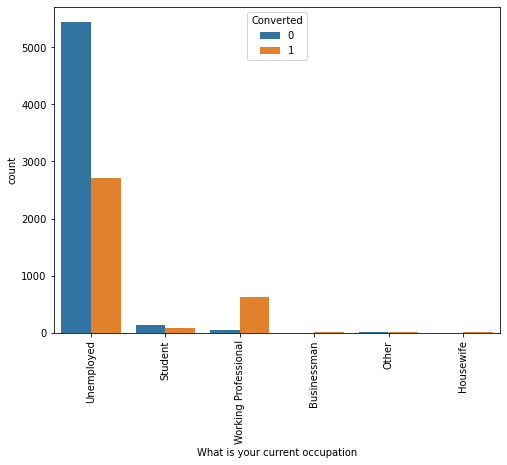

In [58]:
#6 for "What is your current occupation" column

plt.figure(figsize=[8,6])
sns.countplot(x='What is your current occupation',data=leads,hue="Converted")
plt.xticks(rotation=90)

- Working Professionals have very high chance of getting converted and taking up the course

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

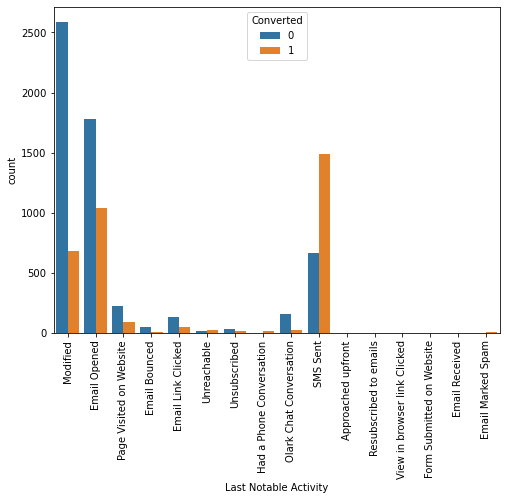

In [59]:
#7 for "last Notable Activity" column
plt.figure(figsize=[8,6])
sns.countplot(x="Last Notable Activity",data=leads,hue="Converted")
plt.xticks(rotation=90)

In [60]:
leads["Last Notable Activity"].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

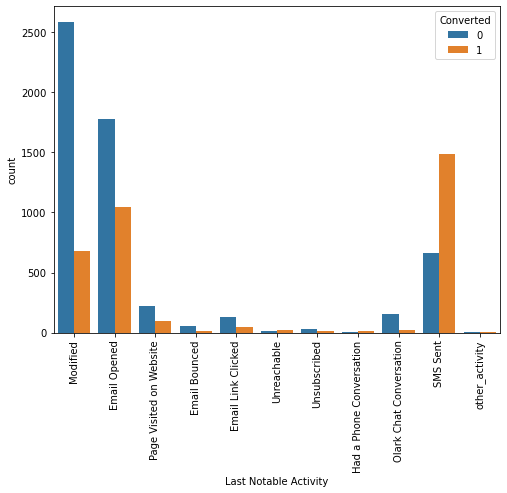

In [61]:
# combining all the unecessary categories of "Last Notable Activity" column
leads["Last Notable Activity"] = leads["Last Notable Activity"].replace(['Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],"other_activity")
plt.figure(figsize=[8,6])
sns.countplot(x="Last Notable Activity",data=leads,hue="Converted")
plt.xticks(rotation=90)

- Under "Last Notable Activity" column, SMS Sent category have high conversion rate

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

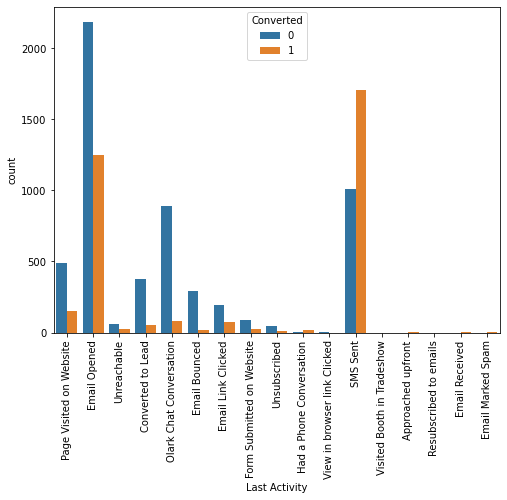

In [62]:
#8 for "last activity" column

plt.figure(figsize=[8,6])
sns.countplot(x="Last Activity",data=leads,hue="Converted")
plt.xticks(rotation=90)

 This is a duplicate column with same attributes as of Last Notable Activity. So it can be dropped.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

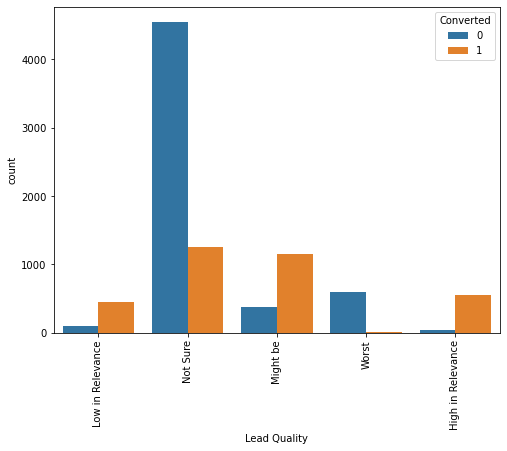

In [63]:
#9 for "Lead Quality" column
plt.figure(figsize=[8,6])
sns.countplot(x="Lead Quality",data=leads,hue="Converted")
plt.xticks(rotation=90)

- Customers who are under Lead Quality of Might be, high in relevance and low in relevance have high chance of getting converted
- And those who are not sure and worst in lead quality have low chance of getting converted

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

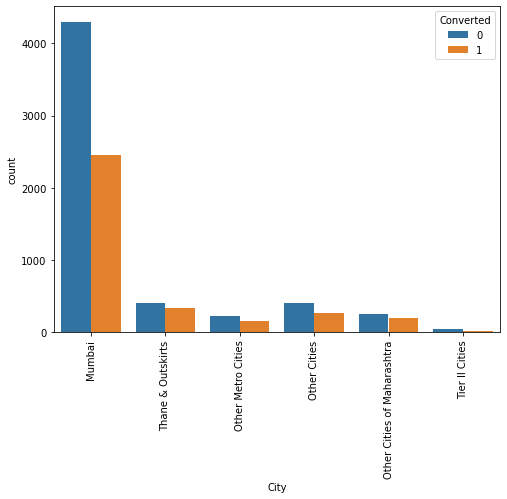

In [64]:
#10 for "City" column

plt.figure(figsize=[8,6])
sns.countplot(x="City",data=leads,hue="Converted")
plt.xticks(rotation=90)

- Majority of customers are from mumbai and they have low conversion rates

## Outlier Analysis

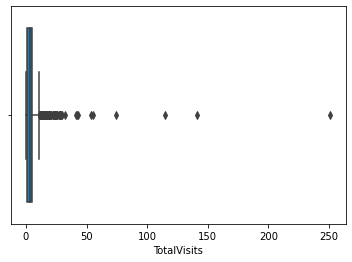

In [67]:
# Boxplots for the numeric columns

#1 for "Total Visits"

sns.boxplot(x="TotalVisits",data=leads)

There are outliers which need to be handled. Here handling is done through hard capping

In [68]:
# hard capping with 95% and 5% quantiles

q1 = leads.TotalVisits.quantile(0.05)
q3 = leads.TotalVisits.quantile(0.95)

leads["TotalVisits"][leads["TotalVisits"]>=q3]=q3

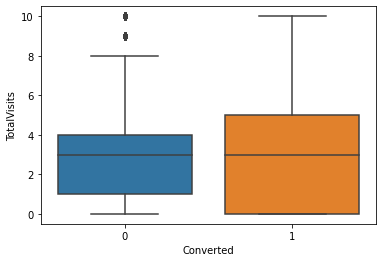

In [69]:
# after capping
sns.boxplot(x = "Converted" , y="TotalVisits",data=leads)

- Here in the case of Total visits, the median for both getting converted and not getting converted is same

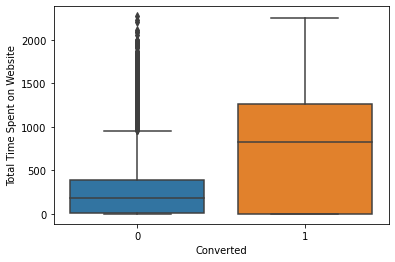

In [70]:
#2 for 'Total Time Spent on Website' column 

sns.boxplot(x="Converted",y='Total Time Spent on Website', data=leads)

- Customers who spend maximum time on the website have high conversion rate

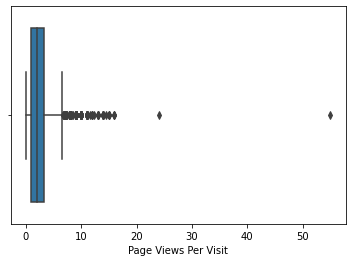

In [71]:
#3 for 'Page Views Per Visit' column

sns.boxplot(x ='Page Views Per Visit', data=leads)

In [72]:
# hard capping 

q1 = leads["Page Views Per Visit"].quantile(0.05)
q3 = leads["Page Views Per Visit"].quantile(0.95)

leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= q3]=q3

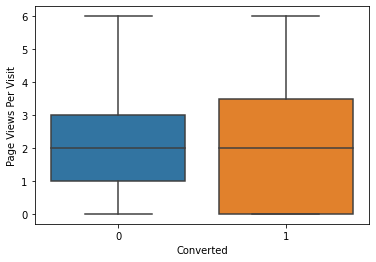

In [73]:
sns.boxplot(x = "Converted", y ='Page Views Per Visit', data=leads)

- Here in "Page views per visit column" also the median is same for both

In [74]:
# Analysis on unnecessary columns which can be dropped

leads['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [76]:
leads["Through Recommendations"].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [77]:
leads["Receive More Updates About Our Courses"].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

- There are many columns which are not generating any insights and are not useful for any further analysis. So they can be dropped.

In [78]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [79]:
# dropping unecessary columns from the dataset

leads.drop(['Prospect ID',"Last Activity","Country",'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque','A free copy of Mastering The Interview'],axis=1,inplace = True)
leads.shape

(9074, 14)

In [80]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Number                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  Tags                             9074 non-null   object 
 12  Lead Quality        

# Data Preparation

In [81]:
# coverting binary variables from YES/NO to 1/0

# List of variables to map

varlist =  ['Do Not Email','Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

leads[varlist] = leads[varlist].apply(binary_map)

In [82]:
leads.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0      660737                      API      Olark Chat             0   
1      660728                      API  Organic Search             0   
2      660727  Landing Page Submission  Direct Traffic             0   
3      660719  Landing Page Submission  Direct Traffic             0   
4      660681  Landing Page Submission          Google             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page Views Per Visit           Specialization  \
0                   0.0                   others   
1                   2.5                   others   
2                   2.0  Business Administration   
3                   1.0    Media and Advertising   
4                   1.0                   others   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

       Lead Quality Last Notable Activity  
0  Low in Relevance              Modified  
1          Not Sure          Email Opened  
2          Might be          Email Opened  
3          Not Sure              Modified  
4          Might be              Modified

### 1. Dummy Variable Creation

In [83]:
#1 Creating dummy variables for all the categorical variables

dummy1 = pd.get_dummies(leads[["Lead Origin","Lead Source","Specialization","What is your current occupation",
                        "Tags","Lead Quality","Last Notable Activity"]],drop_first=True)

# Adding the results to the original dataframe

leads = pd.concat([leads,dummy1],axis=1)

In [84]:
leads.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0      660737                      API      Olark Chat             0   
1      660728                      API  Organic Search             0   
2      660727  Landing Page Submission  Direct Traffic             0   
3      660719  Landing Page Submission  Direct Traffic             0   
4      660681  Landing Page Submission          Google             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page Views Per Visit           Specialization  \
0                   0.0                   others   
1                   2.5                   others   
2                   2.0  Business Administration   
3                   1.0    Media and Advertising   
4                   1.0                   others   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

       Lead Quality Last Notable Activity  \
0  Low in Relevance              Modified   
1          Not Sure          Email Opened   
2          Might be          Email Opened   
3          Not Sure              Modified   
4          Might be              Modified   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Reference  \
0                       1                           0                      0   
1                       0                           1                      0   
2                       0                           0                      0   
3                       0                           0                      0   
4                       0                           0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Lead Source_other_sources  Specialization_Business Administration  \
0                          0                                       0   
1                          0                                       0   
2                          0                                       1   
3                          0                                       0   
4                          0                 

In [85]:
leads.shape

(9074, 73)

In [86]:
#  Dropping repeated variables

# We have created dummies for the below variables, so we can drop them

leads.drop(["Lead Origin","Lead Source","Specialization","What is your current occupation",
                        "Tags","Lead Quality","Last Notable Activity"],axis=1,inplace=True)

In [87]:
leads.head()

Lead Number  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      660737             0            0          0          0.0   
1      660728             0            0          0          5.0   
2      660727             0            0          1          2.0   
3      660719             0            0          0          1.0   
4      660681             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Reference  \
0                       1                           0                      0   
1                       0                           1                      0   
2                       0                           0                      0   
3                       0                           0                      0   
4                       0                           0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Lead Source_other_sources  Specialization_Business Administration  \
0                          0                                       0   
1                          0                                       0   
2                          0                                       1   
3                          0                                       0   
4                          0                                       0   

   Specialization_E-Business  Specialization_E-COMMERCE  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   Specialization_Finance Management  Specialization_Healthcare Management  \
0                                  0                                     0   
1                                  0                                     0   
2                                  0                                     0   
3                                  0                                     0   
4                                  0                                     0   

   Specialization_Hospitality Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_Human Re

### 2. Train-Test Split

In [88]:
#2 Train-Test Split

from sklearn.model_selection import train_test_split

In [89]:
# Putting feature variables to X

X = leads.drop(["Lead Number","Converted"],axis=1)

X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Facebook  \
0                          0                        0                     0   
1                          0                        0                     0   
2                          0                        0                     0   
3                          0                        0                     0   
4                          0                        0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Welingak Website  Lead Source_other_sources  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Specialization_Business Administration  Specialization_E-Business  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   
3                                       0                          0   
4                                       0                          0   

   Specialization_E-COMMERCE  Specialization_Finance Management  \
0                          0                                  0   
1                          0                                  0   
2                          0                                  0   
3                          0                                  0   
4                          0                                  0   

   Specialization_Healthcare Management  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Specialization_Hospitality Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_Human Resource Management  \
0                                         0   
1                                         0   
2                       

In [90]:
# putting response in variable y

y = leads["Converted"]

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [91]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 3. Feature Scaling

In [92]:
#3 Feature Scaling

from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()

X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
3009             0            0    -0.432779                    -0.160255   
1012             1            0    -0.432779                    -0.540048   
9226             0            0    -1.150329                    -0.888650   
4750             0            0    -0.432779                     1.643304   
7987             0            0     0.643547                     2.017593   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3009             -0.155018                                    1   
1012             -0.155018                                    1   
9226             -1.265540                                    0   
4750             -0.155018                                    1   
7987              0.122613                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3009                          0                        0   
1012                          0                        0   
9226                          0                        0   
4750                          0                        0   
7987                          0                        0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
3009                     0                   0                       0   
1012                     0                   0                       0   
9226                     0                   0                       1   
4750                     0                   0                       0   
7987                     0                   0                       0   

      Lead Source_Organic Search  Lead Source_Reference  \
3009                           0                      0   
1012                           0                      0   
9226                           0                      0   
4750                           0                      0   
7987                           0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
3009                           0                             0   
1012                           0                             0   
9226                           0                             0   
4750                           0                             0   
7987                           0                             0   

      Lead Source_other_sources  Specialization_Business Administration  \
3009                          0                                       0   
1012                          0                                       0   
9226                          0                                       0   
4750                          0                                       0   
7987                          0                                       0   

      Specialization_E-Business  Specialization_E-COMMERCE  \
3009                          0                          0   
1012                          0                          0   
9226                          0                          0   
4750                          0                          0   
7987                          0                          0   

      Specialization_Finance Management  Specialization_Healthcare Management  \
3009                                  1                                     0   
1012                                  0                                     0   
9226                                  0                                     0   
4750                                  0                                     0   
7987                                  1                                     0   

      Specialization_Hospitality Management  \
3009                                      0   
1012                                      0   
9226                                      0   
4750                                      0   
7987                                

In [94]:
# checking the conversion rate

conversion =  sum(leads["Converted"])/(len(leads["Converted"]))*100
conversion

37.85541106458012

There are 38% customers who are getting converted. We need to increase this conversion rate by performing modelling

# Model Building

In [95]:
import statsmodels.api as sm

In [96]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6286
Model Family:                Binomial   Df Model:                           64
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1279.8
Date:                Sun, 07 Feb 2021   Deviance:                       2559.6
Time:                        17:40:43   Pearson chi2:                 3.00e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.1823      1.854      1.177      0.239      -1.452       5.817
Do Not Email                                            -1.2884      0.296     -4.356      0.000      -1.868      -0.709
Do Not Call                                             20.3142   2.95e+04      0.001      0.999   -5.78e+04    5.78e+04
TotalVisits                                              0.1787      0.086      2.074      0.038       0.010       0.348
Total Time Spent on Website                              1.1504      0.064     18.114      0.000       1.026       1.275
Page Views Per Visit                                    -0.3148      0.098     -3.216      0.001      -0.507      -0.123
Lead Origin_Landing Page Submission                     -0.9868      0.220     -4.491      0.000      -1.418      -0.556
Lead Origin_Lead Add Form                               -0.0542      1.285     -0.042      0.966      -2.573       2.465
Lead Origin_Lead Import                                 26.7200   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                   -25.5794   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                       0.2230      0.152      1.465      0.143      -0.075       0.521
Lead Source_Olark Chat                                   0.7723      0.225      3.432      0.001       0.331       1.213
Lead Source_Organic Search                               0.2335      0.208      1.121      0.262      -0.175       0.642
Lead Source_Reference                                    1.7036      1.341      1.271      0.204      -0.924       4.331
Lead Source_Referral Sites                              -0.1523      0.493     -0.309      0.757      -1.118       0.814
Lead Source_Welingak Website                             5.4322      1.491      3.644      0.000       2.510       8.354
Lead Source_other_sources                                0.4676      0.776      0.603      0.547      -1.053       1.988
Specialization_Business Administration                  -0.1589      0.393     -0.404      0.686      -0.930       0.612
Specialization_E-Business                               -0.3953      0.711     -0.556      0.578      -1.789       0.999
Specialization_E-COMMERCE                                0.6920      0.565      1.226      0.220      -0.415       1.799
Specialization_Finance Management                       -0.4314      0.348     -1.240      0.215      -1.113       0.250
Specialization_Healthcare Management                    -0.5412      0.508     -1.065      0.287      -1.537       0.455
Specialization_Hospitality Management                   -0

### Feature Selection using RFE

In [97]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [98]:
# Selecting top 15 features using RFE

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [99]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 22),
 ('TotalVisits', False, 31),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('Lead Origin_Landing Page Submission', False, 15),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 35),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', False, 27),
 ('Lead Source_Reference', False, 45),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_other_sources', False, 47),
 ('Specialization_Business Administration', False, 44),
 ('Specialization_E-Business', False, 41),
 ('Specialization_E-COMMERCE', False, 14),
 ('Specialization_Finance Management', False, 25),
 ('Specialization_Healthcare Management', False, 24),
 ('Specialization_Hospitality Management', False, 49),
 ('Specialization_Human Resource Management', False, 40),
 ('Specializa

In [100]:
rfe.support_

array([ True, False, False,  True, False, False,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False,  True,
       False,  True,  True, False,  True, False, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False])

In [101]:
col = X_train.columns[rfe.support_]

In [102]:
X_train.columns[rfe.support_]

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [103]:
# Rebuilding the model with the top 15 features

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1403.6
Date:                Sun, 07 Feb 2021   Deviance:                       2807.3
Time:                        17:40:47   Pearson chi2:                 2.07e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.2054      0.303     -3.979      0.000      -1.799      -0.612
Do Not Email                                  -1.4633      0.229     -6.396      0.000      -1.912      -1.015
Total Time Spent on Website                    0.9248      0.050     18.330      0.000       0.826       1.024
Lead Origin_Lead Add Form                      2.0753      0.365      5.685      0.000       1.360       2.791
Lead Origin_Lead Import                        1.4148      0.731      1.935      0.053      -0.018       2.847
Lead Source_Welingak Website                   3.2132      0.821      3.913      0.000       1.604       4.823
What is your current occupation_Unemployed    -1.0993      0.256     -4.291      0.000      -1.601      -0.597
Tags_Busy                                      3.4033      0.334     10.199      0.000       2.749       4.057
Tags_Closed by Horizzon                        7.7885      0.775     10.044      0.000       6.269       9.308
Tags_Lost to EINS                              8.8982      0.760     11.702      0.000       7.408      10.389
Tags_Ringing                                  -1.6090      0.346     -4.649      0.000      -2.287      -0.931
Tags_Will revert after reading the email       3.8920      0.236     16.471      0.000       3.429       4.355
Tags_switched off                             -2.2818      0.607     -3.761      0.000      -3.471      -1.093
Lead Quality_Not Sure                         -3.0235      0.135    -22.458      0.000      -3.287      -2.760
Lead Quality_Worst                            -3.8474      0.894     -4.305      0.000      -5.599      -2.096
Last Notable Activity_SMS Sent                 2.6437      0.128     20.672      0.000       2.393       2.894
==============================================================================================================
"""

In [104]:
# dropping the column "Lead Origin_Lead Import" with high P-value

col = col.drop("Lead Origin_Lead Import",1)

In [105]:
# Rebuilding the model again

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1405.5
Date:                Sun, 07 Feb 2021   Deviance:                       2811.0
Time:                        17:40:47   Pearson chi2:                 2.08e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.1924      0.302     -3.942      0.000      -1.785      -0.600
Do Not Email                                  -1.4677      0.229     -6.418      0.000      -1.916      -1.019
Total Time Spent on Website                    0.9184      0.050     18.258      0.000       0.820       1.017
Lead Origin_Lead Add Form                      2.0574      0.365      5.631      0.000       1.341       2.774
Lead Source_Welingak Website                   3.2208      0.821      3.922      0.000       1.611       4.831
What is your current occupation_Unemployed    -1.0982      0.256     -4.294      0.000      -1.600      -0.597
Tags_Busy                                      3.4061      0.334     10.206      0.000       2.752       4.060
Tags_Closed by Horizzon                        7.7862      0.775     10.042      0.000       6.266       9.306
Tags_Lost to EINS                              8.8964      0.760     11.700      0.000       7.406      10.387
Tags_Ringing                                  -1.6093      0.346     -4.647      0.000      -2.288      -0.931
Tags_Will revert after reading the email       3.8981      0.236     16.484      0.000       3.435       4.362
Tags_switched off                             -2.2870      0.607     -3.770      0.000      -3.476      -1.098
Lead Quality_Not Sure                         -3.0372      0.135    -22.564      0.000      -3.301      -2.773
Lead Quality_Worst                            -3.8566      0.893     -4.318      0.000      -5.607      -2.106
Last Notable Activity_SMS Sent                 2.6395      0.128     20.652      0.000       2.389       2.890
==============================================================================================================
"""

- All the p- values of the model built are less than 0.05. So proceed.

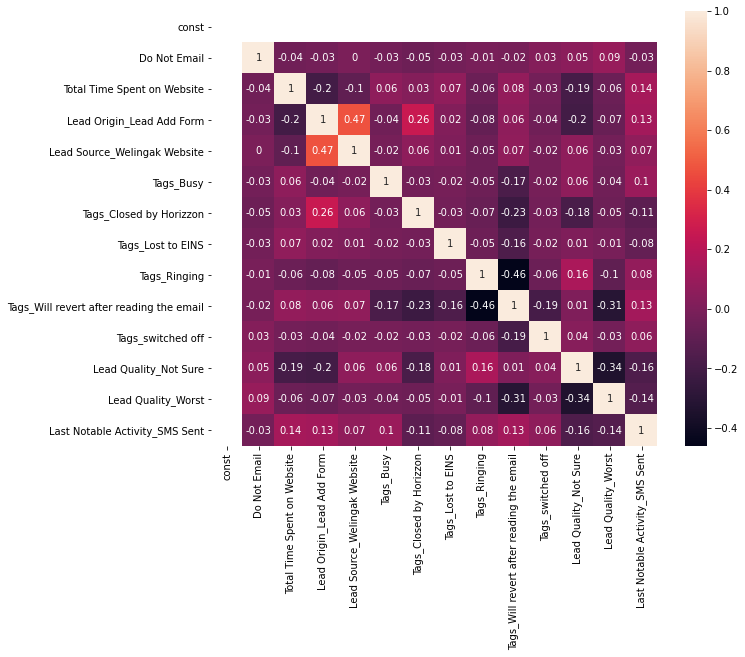

In [182]:
# plotting the heatmap and obtaining the correlation between the top 15 features

plt.figure(figsize=[10,8])
sns.heatmap(round(X_train_sm.corr(),2),annot=True)

### Inferences:

- 'Welingak website' have positive correlation with 'lead add form'.
- Customers who respond after reading the email and with ringing tags are negatively correlated.
- Lead Quality with categories 'worst' and 'not sure' are also negatively correlated 

In [106]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.171240
1012    0.091520
9226    0.000429
4750    0.938141
7987    0.995599
1281    0.993873
2880    0.096294
4971    0.921751
7536    0.984084
1248    0.005321
dtype: float64

In [107]:
# reshaping the above values into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.71239972e-01, 9.15202013e-02, 4.29165612e-04, 9.38140830e-01,
       9.95599326e-01, 9.93873222e-01, 9.62943847e-02, 9.21751465e-01,
       9.84084238e-01, 5.32129939e-03])

In [108]:
# creating a dataframe with actual conversions and predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

Converted  Lead_Prob  LeadID
0          0   0.171240    3009
1          0   0.091520    1012
2          0   0.000429    9226
3          1   0.938141    4750
4          1   0.995599    7987

In [109]:
# creating a new column "predicted" with 1 if lead_prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Converted  Lead_Prob  LeadID  predicted
0          0   0.171240    3009          0
1          0   0.091520    1012          0
2          0   0.000429    9226          0
3          1   0.938141    4750          1
4          1   0.995599    7987          1

### Model Evaluation

In [110]:
# Metrics Evaluation

from sklearn import metrics

In [111]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3701  204]
 [ 301 2145]]


In [112]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9204849629979531


In [113]:
# checking for VIF's

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4   What is your current occupation_Unemployed  7.19
11                       Lead Quality_Not Sure  4.22
9     Tags_Will revert after reading the email  3.89
8                                 Tags_Ringing  1.80
2                    Lead Origin_Lead Add Form  1.71
13              Last Notable Activity_SMS Sent  1.55
12                          Lead Quality_Worst  1.36
3                 Lead Source_Welingak Website  1.34
6                      Tags_Closed by Horizzon  1.27
1                  Total Time Spent on Website  1.19
10                           Tags_switched off  1.16
5                                    Tags_Busy  1.15
0                                 Do Not Email  1.11
7                            Tags_Lost to EINS  1.09

- There is one variable with high VIF. Rebuild the model by dropping it

In [115]:
# dropping "What is your current occupation_Unemployed" column
col = col.drop("What is your current occupation_Unemployed", 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [116]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1415.6
Date:                Sun, 07 Feb 2021   Deviance:                       2831.1
Time:                        17:40:47   Pearson chi2:                 2.32e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.0898      0.222     -9.421      0.000      -2.525      -1.655
Do Not Email                                -1.4441      0.229     -6.298      0.000      -1.893      -0.995
Total Time Spent on Website                  0.9239      0.050     18.396      0.000       0.825       1.022
Lead Origin_Lead Add Form                    2.1743      0.366      5.936      0.000       1.456       2.892
Lead Source_Welingak Website                 3.0845      0.821      3.756      0.000       1.475       4.694
Tags_Busy                                    3.3758      0.333     10.131      0.000       2.723       4.029
Tags_Closed by Horizzon                      7.7919      0.776     10.042      0.000       6.271       9.313
Tags_Lost to EINS                            8.8904      0.760     11.700      0.000       7.401      10.380
Tags_Ringing                                -1.7431      0.345     -5.045      0.000      -2.420      -1.066
Tags_Will revert after reading the email     3.9029      0.235     16.624      0.000       3.443       4.363
Tags_switched off                           -2.4725      0.606     -4.081      0.000      -3.660      -1.285
Lead Quality_Not Sure                       -3.2249      0.130    -24.743      0.000      -3.480      -2.969
Lead Quality_Worst                          -3.8270      0.898     -4.264      0.000      -5.586      -2.068
Last Notable Activity_SMS Sent               2.6319      0.127     20.664      0.000       2.382       2.882
============================================================================================================
"""

In [117]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [118]:
y_train_pred[:10]

array([1.73665531e-01, 3.37374685e-02, 3.78497760e-04, 9.39256527e-01,
       9.95678511e-01, 9.94993752e-01, 9.74332390e-02, 9.20710036e-01,
       9.87196224e-01, 4.76712584e-03])

In [119]:
y_train_pred_final["Lead_Prob"] = y_train_pred

In [120]:
# creating a new column "predicted" with 1 if lead_prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Converted  Lead_Prob  LeadID  predicted
0          0   0.173666    3009          0
1          0   0.033737    1012          0
2          0   0.000378    9226          0
3          1   0.939257    4750          1
4          1   0.995679    7987          1

In [121]:
# calculate the accuracy again
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.9211147850732169


In [122]:
# Checking VIF again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10                     Lead Quality_Not Sure  2.78
8   Tags_Will revert after reading the email  2.67
2                  Lead Origin_Lead Add Form  1.71
12            Last Notable Activity_SMS Sent  1.54
7                               Tags_Ringing  1.52
3               Lead Source_Welingak Website  1.34
1                Total Time Spent on Website  1.18
5                    Tags_Closed by Horizzon  1.15
4                                  Tags_Busy  1.11
0                               Do Not Email  1.10
9                          Tags_switched off  1.10
6                          Tags_Lost to EINS  1.06
11                        Lead Quality_Worst  1.03

All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [123]:
# lets look at confusion matrix and accuracy again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[3701  204]
 [ 297 2149]]


In [124]:
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.9211147850732169


In [125]:
# Metrics beyond accuracy

TN = confusion[0,0] #True Negative
FP = confusion[0,1] #False Positive
FN = confusion[1,0] #False Negative
TP = confusion[1,1] #True Positive

In [126]:
# Sensitivity (True Positive Rate)

TP/float(TP+FN)

0.8785772690106296

In [127]:
# Specificity 

TN/float(TN+FP)

0.9477592829705506

In [128]:
# False positive Rate

FP/float(TN+FP)

0.05224071702944942

In [129]:
# Positive Predicted Value

TP/float(FP+TP)

0.9133021674458138

In [130]:
# Negative Predicted Value

TN/float(TN+FN)

0.9257128564282141

 The above metrics are evaluated for threshold of 0.5. Now we need to find the optimal threshold probability

### Plotting the ROC Curve

In [131]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [132]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Lead_Prob, drop_intermediate = False )

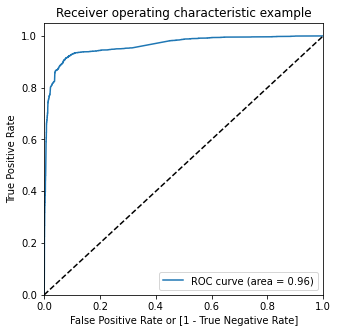

In [133]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_Prob)

### Finding optimal cutoff (threshold)

In [134]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Lead_Prob  LeadID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0   0.173666    3009          0    1    1    0    0    0    0    0   
1          0   0.033737    1012          0    1    0    0    0    0    0    0   
2          0   0.000378    9226          0    1    0    0    0    0    0    0   
3          1   0.939257    4750          1    1    1    1    1    1    1    1   
4          1   0.995679    7987          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    1    1  
4    1    1    1

In [135]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.795780  0.952576  0.697567
0.2   0.2  0.906157  0.934996  0.888092
0.3   0.3  0.916549  0.920278  0.914213
0.4   0.4  0.920485  0.905560  0.929834
0.5   0.5  0.921115  0.878577  0.947759
0.6   0.6  0.910093  0.825838  0.962868
0.7   0.7  0.910093  0.806623  0.974904
0.8   0.8  0.894505  0.749387  0.985403
0.9   0.9  0.868840  0.674571  0.990525


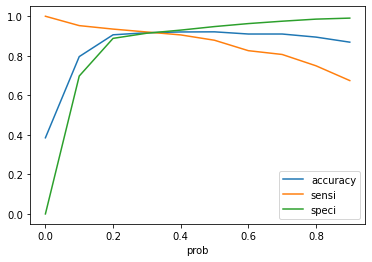

In [136]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [137]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Lead_Prob  LeadID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0   0.173666    3009          0    1    1    0    0    0    0    0   
1          0   0.033737    1012          0    1    0    0    0    0    0    0   
2          0   0.000378    9226          0    1    0    0    0    0    0    0   
3          1   0.939257    4750          1    1    1    1    1    1    1    1   
4          1   0.995679    7987          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    1    1    1                1  
4    1    1    1                1

In [138]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9165485750275547

In [139]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
print(confusion2)

[[3570  335]
 [ 195 2251]]


In [140]:
TN = confusion2[0,0] #True Negative
FP = confusion2[0,1] #False Positive
FN = confusion2[1,0] #False Negative
TP = confusion2[1,1] #True Positive

In [141]:
# Sensitivity

TP/float(TP+FN)

0.9202780049059689

In [142]:
# Specificity 

TN/float(TN+FP)

0.9142125480153649

In [143]:
# False positive Rate

FP/float(TN+FP)

0.08578745198463508

In [144]:
# Positive Predicted Value

TP/float(FP+TP)

0.8704563031709204

In [145]:
# Negative Predicted Value

TN/float(TN+FN)

0.9482071713147411

### Precision and Recall Tradeoff

In [146]:
# Precision

TP/float(TP+FP)

0.8704563031709204

In [147]:
# Recall or (Sensitivity)

TP/float(TP+FN)

0.9202780049059689

In [148]:
# Tradeoff between the two

from sklearn.metrics import precision_recall_curve

In [149]:
p,r,thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Lead_Prob)

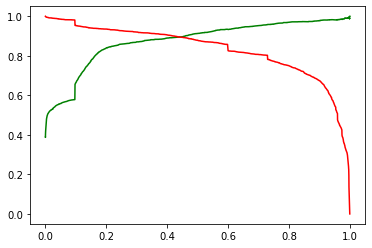

In [150]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [151]:
# Final dataframe with all the Leads and with there respective lead_scores

y_train_pred_final["Lead_Score"] = round(y_train_pred_final["Lead_Prob"]*100,2)

y_train_pred_final.head()

Converted  Lead_Prob  LeadID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0   0.173666    3009          0    1    1    0    0    0    0    0   
1          0   0.033737    1012          0    1    0    0    0    0    0    0   
2          0   0.000378    9226          0    1    0    0    0    0    0    0   
3          1   0.939257    4750          1    1    1    1    1    1    1    1   
4          1   0.995679    7987          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  final_predicted  Lead_Score  
0    0    0    0                0       17.37  
1    0    0    0                0        3.37  
2    0    0    0                0        0.04  
3    1    1    1                1       93.93  
4    1    1    1                1       99.57

## Making Predictions on Test Dataset

In [152]:
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [153]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
3271             0                    -0.600595                          0   
1490             0                     1.887326                          0   
7936             0                    -0.752879                          0   
4216             0                    -0.888650                          1   
3830             0                    -0.587751                          0   

      Lead Source_Welingak Website  Tags_Busy  Tags_Closed by Horizzon  \
3271                             0          0                        0   
1490                             0          0                        0   
7936                             0          0                        0   
4216                             0          0                        1   
3830                             0          0                        0   

      Tags_Lost to EINS  Tags_Ringing  \
3271                  0             0   
1490                  0             0   
7936                  0             0   
4216                  0             0   
3830                  0             0   

      Tags_Will revert after reading the email  Tags_switched off  \
3271                                         1                  0   
1490                                         1                  0   
7936                                         1                  0   
4216                                         0                  0   
3830                                         1                  0   

      Lead Quality_Not Sure  Lead Quality_Worst  \
3271                      1                   0   
1490                      0                   0   
7936                      1                   0   
4216                      0                   0   
3830                      1                   0   

      Last Notable Activity_SMS Sent  
3271                               0  
1490                               0  
7936                               0  
4216                               0  
3830                               0

In [154]:
X_test_sm = sm.add_constant(X_test)

In [155]:
# predictions on test dataset
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.122742
1490    0.972263
7936    0.108378
4216    0.999138
3830    0.124026
1800    0.754154
6507    0.006507
4821    0.000580
4223    0.996977
4714    0.096839
dtype: float64

In [156]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
3271  0.122742
1490  0.972263
7936  0.108378
4216  0.999138
3830  0.124026

In [157]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
3271          0
1490          1
7936          0
4216          1
3830          0

In [158]:
# Putting LeadID to index
y_test_df["LeadID"] = y_test_df.index

In [159]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [160]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

Converted  LeadID         0
0          0    3271  0.122742
1          1    1490  0.972263
2          0    7936  0.108378
3          1    4216  0.999138
4          0    3830  0.124026

In [161]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Lead_Prob'], axis=1)
y_pred_final.head()

LeadID  Converted  Lead_Prob
0    3271          0   0.122742
1    1490          1   0.972263
2    7936          0   0.108378
3    4216          1   0.999138
4    3830          0   0.124026

In [162]:
y_pred_final['final_predicted'] = y_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

LeadID  Converted  Lead_Prob  final_predicted
0    3271          0   0.122742                0
1    1490          1   0.972263                1
2    7936          0   0.108378                0
3    4216          1   0.999138                1
4    3830          0   0.124026                0

In [163]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9074550128534704

In [164]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1577,  157],
       [  95,  894]], dtype=int64)

In [165]:
TN = confusion3[0,0] #True Negative
FP = confusion3[0,1] #False Positive
FN = confusion3[1,0] #False Negative
TP = confusion3[1,1] #True Positive

In [166]:
# Let's see the Sensitivity or Recall of our logistic regression model
TP / float(TP+FN)

0.9039433771486349

In [170]:
# Let us calculate specificity
TN / float(TN+FP)

0.9094579008073818

In [171]:
# Precision, Recall and f1_score
from sklearn.metrics import precision_score,recall_score,f1_score

In [172]:
precision_score(y_pred_final.Converted,y_pred_final.final_predicted)

0.8506184586108468

In [173]:
recall_score(y_pred_final.Converted,y_pred_final.final_predicted)

0.9039433771486349

In [176]:
# f1_score is the harmonic mean of both precision and recall-----> 2*[(Precision * Recall)/(Precision + Recall)] 

f1_score(y_pred_final.Converted,y_pred_final.final_predicted)

0.876470588235294

#### Finally Lead_score can be calculated by multiplying all the lead probabilities by 100

In [177]:
y_pred_final["Lead_Score"] = round(y_pred_final["Lead_Prob"]*100,2)
y_pred_final.head()

LeadID  Converted  Lead_Prob  final_predicted  Lead_Score
0    3271          0   0.122742                0       12.27
1    1490          1   0.972263                1       97.23
2    7936          0   0.108378                0       10.84
3    4216          1   0.999138                1       99.91
4    3830          0   0.124026                0       12.40

- Therefore the logistic regression model built on the given dataset has given a sensitivity of 90% on test dataset, which indicates that the model built has increased the rate of conversion.